# 보스턴 데이터 실습2
### test,train에서 추출한 data에서 feature selection을 진행 (df는 1개인데, test,train이 여러개)

In [13]:
#from scipy import stats  # 과학용 계산 라이브러리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
file_path = "/Users/yunseongmun/Documents/Ai_Lecture/data/boston.csv"
df = pd.read_csv(file_path, index_col=0)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


| MedInc | 블록의 중간 소득 |
| HouseAge | 블록의 중간 주택 연도 |
| AveRooms | 주택 1가구당 평균 방의 수 |
| AveBedrms | 주택 1가구당 평균 침실의 수 |
| Population | 인구 |
| AveOccup |  average house occupancy 평균 주택점유율 |
| Latitude | 위도 |
| Longitude | 경도 |

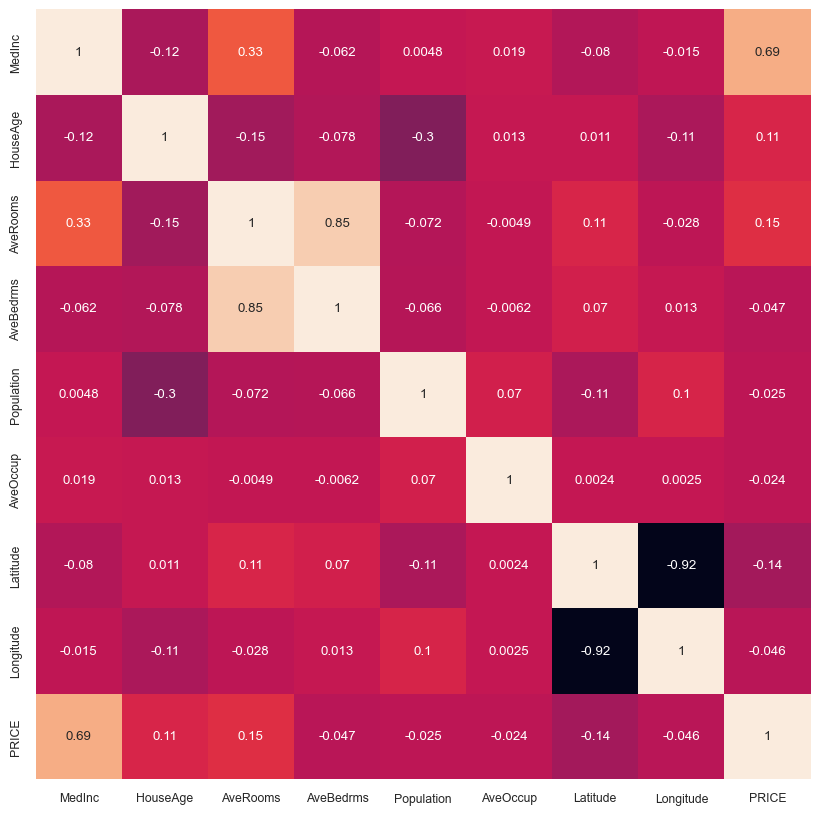

In [2]:
import matplotlib.pyplot as plt
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

# PRICE와 높은 건  MedInc

### 최소 MSE 찾기 (단, Price를 label로 가정)
data set 종류:  
1. all feature 
2. Price와 상관관계가 음수인 feature 제거.  
3. 2번에서 HouseAge 제거
4. 2번에서 AveRooms 제거
5. 2번에서 MedInc 제거

위 5가지 데이터 셋의 mse를 비교하여 최소 mse를 찾는다.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
X = df.drop('PRICE',axis=1)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
y = df['PRICE']
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: PRICE, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test=train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    random_state=12)

dx_train = []
dx_test =[]
# 0번 df : 모든 feature존재
dx_train.append(X_train.copy())
dx_test.append(X_test.copy())
# 1번 df : PRICE와 상관관계가 음수인 feature 제거
columns_to_drop = dx_train[0].loc[:, 'AveBedrms':'Longitude'].columns
dx_train.append(dx_train[0].drop(columns=columns_to_drop))

columns_to_drop = dx_test[0].loc[:, 'AveBedrms':'Longitude'].columns
dx_test.append(dx_test[0].drop(columns=columns_to_drop))

# 2번 df : 1번에서 HouseAge 제거
dx_train.append(dx_train[1].drop('HouseAge',axis=1))
dx_test.append(dx_test[1].drop('HouseAge',axis=1))
# 3번 df : 1번에서 AveRooms 제거
dx_train.append(dx_train[1].drop('AveRooms',axis=1))
dx_test.append(dx_test[1].drop('AveRooms',axis=1))
# 4번 df : 1번에서 MedInc 제거
dx_train.append(dx_train[1].drop('MedInc',axis=1))
dx_test.append(dx_test[1].drop('MedInc',axis=1))

for i in range(5):
    print(f'(x{i},y) train: {dx_train[i].shape}, {y_train.shape}')
    print(f'(x{i},y) test: {dx_test[i].shape}, {y_test.shape}')
    print('--------------------------------')



(x0,y) train: (16512, 8), (16512,)
(x0,y) test: (4128, 8), (4128,)
--------------------------------
(x1,y) train: (16512, 3), (16512,)
(x1,y) test: (4128, 3), (4128,)
--------------------------------
(x2,y) train: (16512, 2), (16512,)
(x2,y) test: (4128, 2), (4128,)
--------------------------------
(x3,y) train: (16512, 2), (16512,)
(x3,y) test: (4128, 2), (4128,)
--------------------------------
(x4,y) train: (16512, 2), (16512,)
(x4,y) test: (4128, 2), (4128,)
--------------------------------


In [7]:
from sklearn.linear_model import LinearRegression

model=[]
for i in range(5):
    model.append(LinearRegression())
    model[i].fit(dx_train[i], y_train)

from sklearn.metrics import mean_squared_error

ly_preds = []
for i in range(5):
    ly_preds.append(model[i].predict(dx_test[i]))
    print(f'평균제곱근오차{i}', mean_squared_error(ly_preds[i], y_test))

# 모든 feature가 있을 때, mse가 가장 작다.
# feature를 없앨수록 mse가 커진다.
# 3번 df가 2번 df보다 상관관계가 높은 feature를 제거했음에도 2번 mse가 3번 mse보다 크다.
# 상관관계의 차이가 크지 않다면 역전될 수도 있음을 나타낸다

평균제곱근오차0 0.5269927956248033
평균제곱근오차1 0.6505245697389264
평균제곱근오차2 0.6916011698420803
평균제곱근오차3 0.6562186483378228
평균제곱근오차4 1.3095031173587612


In [8]:
from sklearn.tree import DecisionTreeRegressor

model=[]
for i in range(5):
    model.append(DecisionTreeRegressor())
    model[i].fit(dx_train[i], y_train)

from sklearn.metrics import mean_squared_error

dy_preds = []
for i in range(5):
    dy_preds.append(model[i].predict(dx_test[i]))
    print(f'평균제곱근오차{i}', mean_squared_error(dy_preds[i], y_test))

# 모든 feature가 있을 때, mse가 가장 작다.
# feature를 없앨수록 mse가 커진다.
# 3번 df가 2번 df보다 상관관계가 높은 feature를 제거했음에도 2번 mse가 3번 mse보다 크다.
# 상관관계의 차이가 크지 않다면 역전될 수도 있음을 나타낸다

평균제곱근오차0 0.4761564082603924
평균제곱근오차1 1.0710441512458089
평균제곱근오차2 1.175705107292902
평균제곱근오차3 1.165730356993188
평균제곱근오차4 2.1167392900373003


In [9]:
from sklearn.ensemble import RandomForestRegressor

model=[]
for i in range(5):
    model.append(RandomForestRegressor())
    model[i].fit(dx_train[i], y_train)

from sklearn.metrics import mean_squared_error

ry_preds = []
for i in range(5):
    ry_preds.append(model[i].predict(dx_test[i]))
    print(f'평균제곱근오차{i}', mean_squared_error(ry_preds[i], y_test))

# 모든 feature가 있을 때, mse가 가장 작다.
# feature를 없앨수록 mse가 커진다.
# 상관관계가 큰 feature를 없앨수록 mse가 커진다.

평균제곱근오차0 0.2511708047839589
평균제곱근오차1 0.5792138509544983
평균제곱근오차2 0.6880765616391006
평균제곱근오차3 0.7536941047359186
평균제곱근오차4 1.3263409642124413


In [11]:
from sklearn.svm import SVR

model=[]
for i in range(5):
    model.append(SVR(kernel='linear'))
    model[i].fit(dx_train[i], y_train)

from sklearn.metrics import mean_squared_error

ry_preds = []
for i in range(5):
    ry_preds.append(model[i].predict(dx_test[i]))
    print(f'평균제곱근오차{i}', mean_squared_error(ry_preds[i], y_test))

평균제곱근오차0 1.2087958796688048
평균제곱근오차1 0.6762059731382235
평균제곱근오차2 0.7195815689617978
평균제곱근오차3 0.6848485708901485
평균제곱근오차4 1.3407138963427343


In [10]:
from sklearn.neighbors import KNeighborsRegressor

model=[]
for i in range(5):
    model.append(KNeighborsRegressor(n_neighbors=6))
    model[i].fit(dx_train[i], y_train)

from sklearn.metrics import mean_squared_error

knn_preds = []
for i in range(5):
    knn_preds.append(model[i].predict(dx_test[i]))
    print(f'평균제곱근오차{i}', mean_squared_error(knn_preds[i], y_test))

# knn 알고리즘에서만, 모든 feature가 존재할 때, mse가 가장 크다.
# 상관관계가 음수인 feature를 모두 제외했을 때가 가장 작다.

평균제곱근오차0 1.1592442931730156
평균제곱근오차1 0.5994302319787366
평균제곱근오차2 0.6690716835624058
평균제곱근오차3 0.6813807275496803
평균제곱근오차4 1.2372257228683


### 결론

최소 MSE = 0.254108644310383 
1. RandomForest 모델
2. 모든 feature가 있을 때  
  
위 두조건을 만족했을 때가 가장 mse가 작다.  
knn을 제외한 나머지 모델들은 이미 데이터에 적합하거나 underfitting인 모델이다.  
그래서, feature selection을 진행하면, underfitting이 악화된다.  

반면, knn의 경우, 모든 feature가 있었을 때는 overfitting이였다가   
상관관계가 양수인 feature에 한해서만 feature selection을 진행한후 모델이 개선되었다.  
하지만, 여기서 더 feature를 제거하면, underfitting으로 악화된다.  